<a href="https://colab.research.google.com/github/Shankars57/Deep_Learning/blob/main/DeepLeaning_Exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3578 - loss: 2.8945 - val_accuracy: 0.6897 - val_loss: 1.4941
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6568 - loss: 1.4609 - val_accuracy: 0.7108 - val_loss: 1.2488
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7283 - loss: 1.1258 - val_accuracy: 0.7475 - val_loss: 1.1378
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7792 - loss: 0.9124 - val_accuracy: 0.7697 - val_loss: 1.0840
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7992 - loss: 0.7717 - val_accuracy: 0.7786 - val_loss: 1.0604
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8419 - loss: 0.6354 - val_accuracy: 0.7887 - val_loss: 1.0237
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8608 - loss: 0.5555 - val_accuracy: 0.7953 - val_loss: 1.0302
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8716 - loss: 0.4948 - val_accuracy: 0.7987 - v

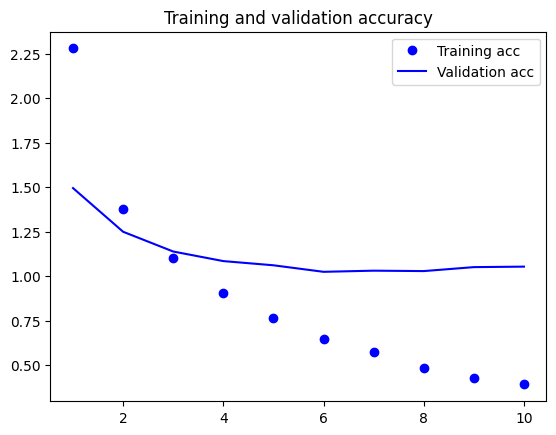

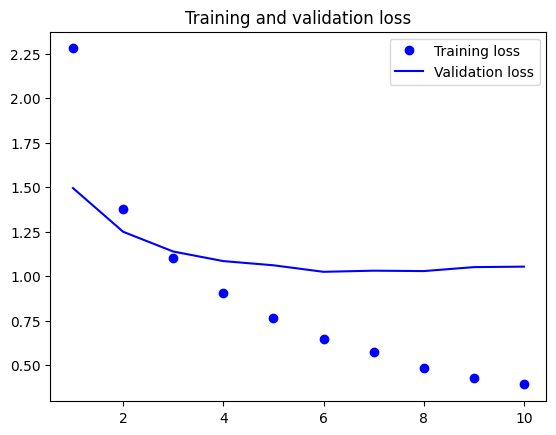

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
 [[ 8  1  0 ...  0  0  0]
 [ 0 85  0 ...  0  0  0]
 [ 0  3 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.66      0.81      0.73       105
           2       0.80      0.60      0.69        20
           3       0.91      0.94      0.93       813
           4       0.83      0.89      0.86       474
           5       0.00      0.00      0.00         5
           6       0.71      0.86      0.77        14
           7       1.00      0.33      0.50         3
           8       0.68      0.74      0.71        38
           9       0.80      0.80      0.80        25
          10       0.93      0.93      0.93        30
          11       0.63      0.78      0.70        83
          12       0.60      0.23      0.33        13
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation


(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

len(x_train)
len(x_test)
len(y_train)
len(y_test)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
num_classes = 46
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(128, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history =model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)
test_loss , test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)
print(history.history)
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report


# Assuming model is already defined and trained
y_pred = np.argmax(model.predict(x_test), axis=1)  # For multi-class classification
y_true_classes = np.argmax(y_test,axis=1)
# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_true_classes, y_pred)
print("Classification Report:\n", report)